# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [6]:
import pandas as pd

titles = pd.read_csv("/Users/manuela/OIM7502_SP25/data/Archive/titles.csv")
cast = pd.read_csv("/Users/manuela/OIM7502_SP25/data/Archive/cast.csv")
release_dates = pd.read_csv("/Users/manuela/OIM7502_SP25/data/Archive/release_dates.csv")


In [8]:

print("Titles")
print(titles.info())
print("\nCast")
print(cast.info())
print("\nRelease Dates")
print(release_dates.info())


Titles
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226012 non-null  object
 1   year    226013 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB
None

Cast
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB
None

Release Dates
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443485 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non

In [10]:
print(f"Titles: {len(titles)} rows")
print(f"Cast: {len(cast)} rows")
print(f"Release Dates: {len(release_dates)} rows")


Titles: 226013 rows
Cast: 3442902 rows
Release Dates: 443486 rows



1. titles.csv
Rows: 226,013
Columns: 2 (title, type)
This dataset lists all film and TV titles, with a label for each indicating whether it is a movie, short, TV episode, etc.

3. cast.csv
Rows: 3,442,902
Columns: 4 (title, name, character, n)
This is the largest dataset, containing detailed casting information. Each row represents a person (actor/actress) who played a character in a title. Since each title can have many actors, this table has millions of records.


3. release_dates.csv
Rows: 443,486
Columns: 2 (title, release_year)
This dataset provides the year that each title was released. Some titles may appear more than once if they have multiple release records.

### 2. How many movies have the title North by Northwest

In [25]:

north_by_northwest = titles[titles['title'] == 'North by Northwest']

count = len(north_by_northwest)

print(f"\nNumber of movies with the title 'North by Northwest': {count}")




Number of movies with the title 'North by Northwest': 1


### 3. How many version of Hamlet are there, when was the first made? the last?

In [29]:
hamlet_versions = titles[titles['title'] == 'Hamlet']

count = len(hamlet_versions)

first_year = hamlet_versions['year'].min()
last_year = hamlet_versions['year'].max()

print(f"\nNumber of versions of 'Hamlet': {count}")
print(f"First version released in: {first_year}")
print(f"Most recent version released in: {last_year}")



Number of versions of 'Hamlet': 20
First version released in: 1910
Most recent version released in: 2017


### 4. List all the movies called Treasure Island from oldest to newest

In [33]:
treasure_island = titles[titles['title'] == 'Treasure Island']

treasure_island_sorted = treasure_island.sort_values(by='year')

print("\nAll 'Treasure Island' movies from oldest to newest:")
print(treasure_island_sorted[['title', 'year']])



All 'Treasure Island' movies from oldest to newest:
                  title  year
180911  Treasure Island  1918
108853  Treasure Island  1920
87953   Treasure Island  1934
126321  Treasure Island  1950
190233  Treasure Island  1972
122150  Treasure Island  1973
52099   Treasure Island  1985
36752   Treasure Island  1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [37]:
years = [1950, 1980, 2000]
movie_counts = titles[titles['year'].isin(years)]['year'].value_counts().sort_index()


for year in years:
    count = movie_counts.get(year, 0)
    print(f"Number of movies made in {year}: {count}")


Number of movies made in 1950: 1109
Number of movies made in 1980: 1750
Number of movies made in 2000: 2568


### 6. How big was the cast of Metropolis


In [39]:
metropolis_cast = cast[cast['title'] == 'Metropolis']

cast_size = metropolis_cast.shape[0]

print(f"The cast of 'Metropolis' had {cast_size} people.")


The cast of 'Metropolis' had 33 people.


### 7. How many roles for actors were there 1950's? 1990's

In [41]:
roles_1950s = cast[(cast['year'] >= 1950) & (cast['year'] <= 1959)]

roles_1990s = cast[(cast['year'] >= 1990) & (cast['year'] <= 1999)]

count_1950s = roles_1950s.shape[0]
count_1990s = roles_1990s.shape[0]


print(f"Number of roles for actors in the 1950s: {count_1950s}")
print(f"Number of roles for actors in the 1990s: {count_1990s}")


Number of roles for actors in the 1950s: 209890
Number of roles for actors in the 1990s: 361218


### 8. How many roles for actors & actresses over time? Output should be a line graph

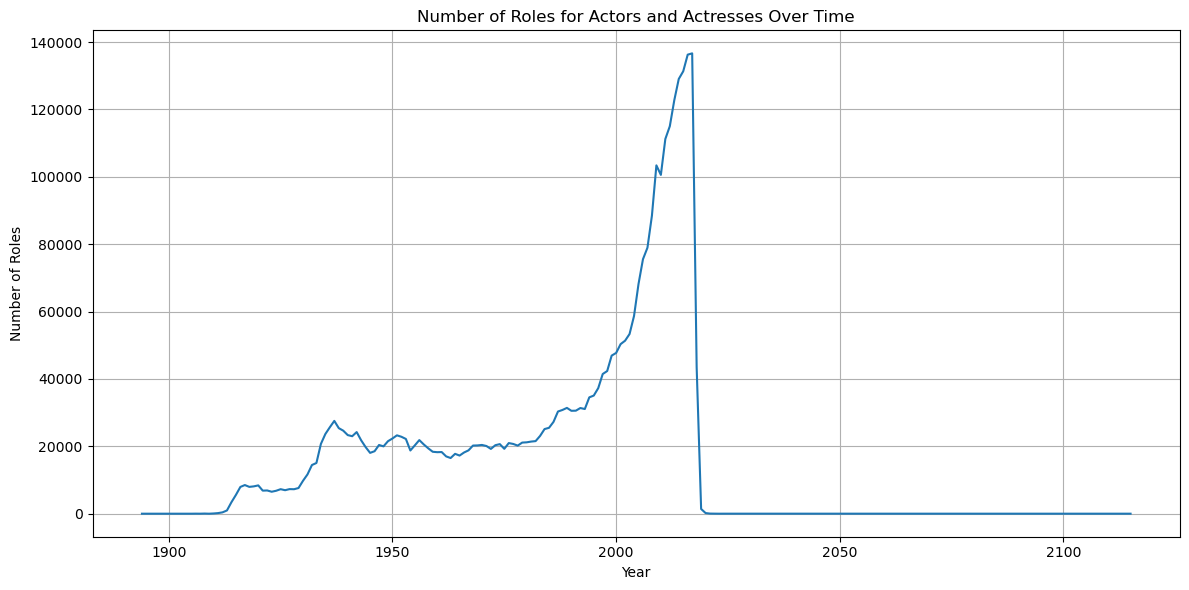

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for actors and actresses
cast_filtered = cast[cast['type'].isin(['actor', 'actress'])]

# Extract the year from the 'year' column
cast_filtered = cast_filtered.dropna(subset=['year'])
cast_filtered['year'] = cast_filtered['year'].astype(int)

# Group by year and count the number of roles
roles_per_year = cast_filtered.groupby('year').size()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(roles_per_year.index, roles_per_year.values)
plt.title('Number of Roles for Actors and Actresses Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.grid(True)
plt.tight_layout()
plt.show()


### 9. How many "leading roles" were there in the 2000's?

In [49]:

leading_roles = cast.dropna(subset=['year', 'n']).copy()

# Convert 'year' to integer
leading_roles['year'] = leading_roles['year'].astype(int)

# Filter for leading roles (n == 1) in the 2000s
leading_roles_2000s = leading_roles[
    (leading_roles['year'] >= 2000) &
    (leading_roles['year'] <= 2009) &
    (leading_roles['n'] == 1)
]

# Count the number of leading roles
num_leading_roles = len(leading_roles_2000s)
print("Number of leading roles in the 2000s:", num_leading_roles)



Number of leading roles in the 2000s: 23593


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [51]:
# Make a copy and convert 'year' safely
cast_copy = cast.dropna(subset=['year']).copy()
cast_copy['year'] = cast_copy['year'].astype(int)

# 2000s: roles with missing 'n'
no_rank_2000s = cast_copy[(cast_copy['year'] >= 2000) &
                          (cast_copy['year'] <= 2009) &
                          (cast_copy['n'].isna())]

# 1950s: roles with missing 'n'
no_rank_1950s = cast_copy[(cast_copy['year'] >= 1950) &
                          (cast_copy['year'] <= 1959) &
                          (cast_copy['n'].isna())]

# Print the results
print("Roles with no ranking in the 2000s:", len(no_rank_2000s))
print("Roles with no ranking in the 1950s:", len(no_rank_1950s))


Roles with no ranking in the 2000s: 232037
Roles with no ranking in the 1950s: 95406


### 11. Plot the number of films made in each decade

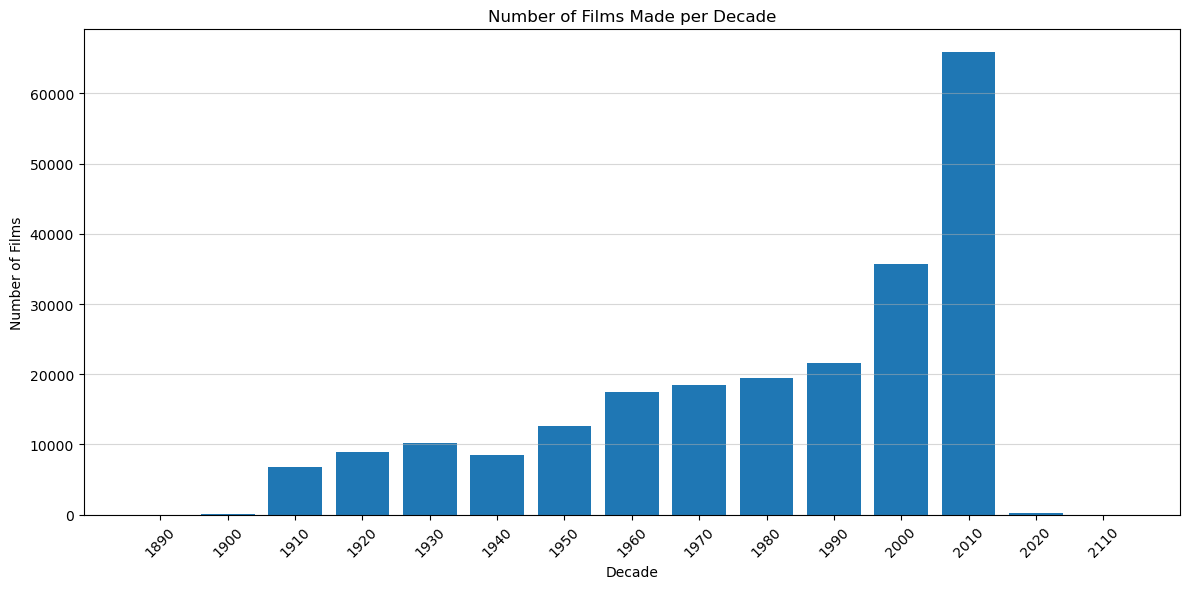

In [53]:
import matplotlib.pyplot as plt

# Drop rows with missing years
titles_clean = titles.dropna(subset=['year']).copy()

# Convert year to integer
titles_clean['year'] = titles_clean['year'].astype(int)

# Create a new column for the decade
titles_clean['decade'] = (titles_clean['year'] // 10) * 10

# Count the number of titles per decade
films_per_decade = titles_clean['decade'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
plt.bar(films_per_decade.index.astype(str), films_per_decade.values)
plt.title('Number of Films Made per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


### 12. Plot the number of films with a Rustler character over time

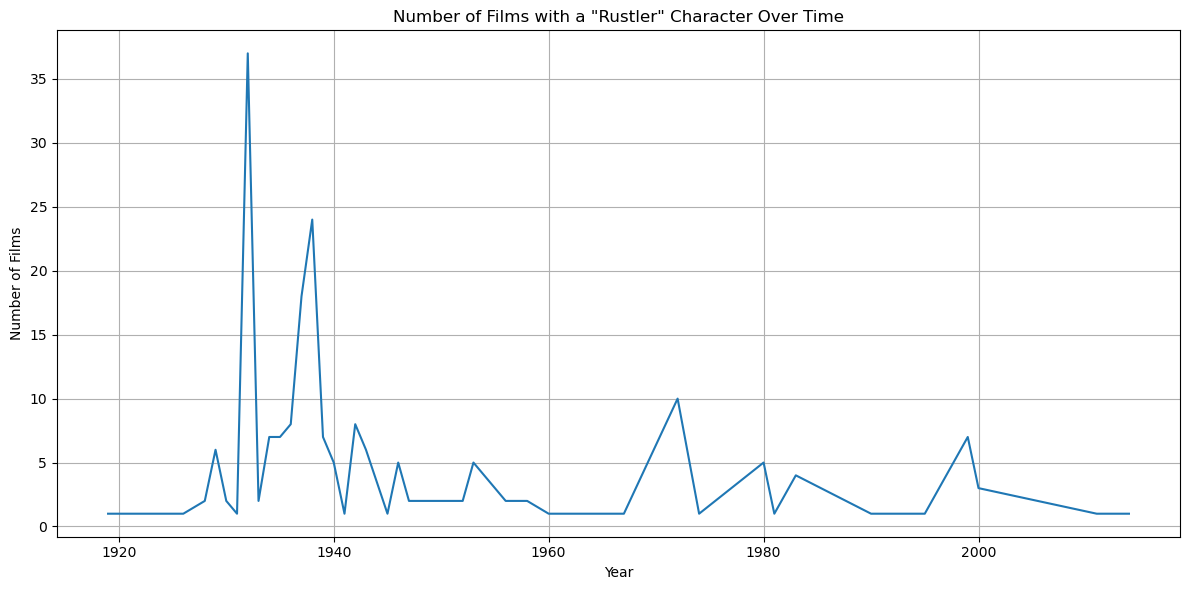

In [55]:
import matplotlib.pyplot as plt

# Drop rows with missing year
cast_clean = cast.dropna(subset=['year']).copy()
cast_clean['year'] = cast_clean['year'].astype(int)

# Filter for rows where the character includes "Rustler"
rustler_roles = cast_clean[cast_clean['character'].str.contains("Rustler", case=False, na=False)]

# Group by year and count
rustler_count_by_year = rustler_roles.groupby('year').size()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(rustler_count_by_year.index, rustler_count_by_year.values)
plt.title('Number of Films with a "Rustler" Character Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Films')
plt.grid(True)
plt.tight_layout()
plt.show()


### 13. What are the top ten character names of all time?

In [59]:
cast_clean = cast.dropna(subset=['character'])

top_characters = cast_clean['character'].value_counts().head(10)

print("Top 10 character names of all time:")
print(top_characters)


Top 10 character names of all time:
character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [63]:
cast_clean = cast.dropna(subset=['year', 'name']).copy()
cast_clean['year'] = cast_clean['year'].astype(int)

cast_90s = cast_clean[(cast_clean['year'] >= 1990) & (cast_clean['year'] <= 1999)]

top_actor_90s = cast_90s['name'].value_counts().head(1)

print("Actor with the most film appearances in the 1990s:")
print(top_actor_90s)


Actor with the most film appearances in the 1990s:
name
Shakti Kapoor    143
Name: count, dtype: int64


### 15. What are the top 10 roles that start with Science?

In [65]:
# Drop rows with missing character names
cast_clean = cast.dropna(subset=['character'])

# Filter for character names starting with "Science"
science_roles = cast_clean[cast_clean['character'].str.startswith('Science', na=False)]

# Count and display the top 10 most common ones
top_science_roles = science_roles['character'].value_counts().head(10)

print("Top 10 roles starting with 'Science':")
print(top_science_roles)


Top 10 roles starting with 'Science':
character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64


### 16. What film has the largest cast

In [67]:
cast_clean = cast.dropna(subset=['title'])

cast_counts = cast_clean.groupby(['title', 'year']).size().reset_index(name='cast_size')

largest_cast_film = cast_counts.sort_values('cast_size', ascending=False).head(1)

print("Film with the largest cast:")
print(largest_cast_film)


Film with the largest cast:
                             title  year  cast_size
12037  Around the World in 80 Days  1956       1299


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [69]:
cast_clean = cast.dropna(subset=['title', 'year']).copy()

cast_size_df = cast_clean.groupby(['title', 'year']).size().reset_index(name='cast_size')

cast_stats = cast_size_df['cast_size'].describe()

print("Descriptive statistics for cast size:")
print(cast_stats)


Descriptive statistics for cast size:
count    182497.000000
mean         18.865494
std          21.241247
min           1.000000
25%           6.000000
50%          13.000000
75%          24.000000
max        1299.000000
Name: cast_size, dtype: float64


Most films have small to medium-sized casts. The average cast size is around 19, but the median is lower at 13, showing that a few films with very large casts raise the average. The data is right-skewed, with some films having hundreds of credited roles — the largest has 1,299. This suggests wide variation, with most films having fewer than 25 roles, but a few outliers significantly increase the overall mean.

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [74]:
# Drop missing years
cast_clean = cast.dropna(subset=['year']).copy()
cast_clean['year'] = cast_clean['year'].astype(int)

# Filter for Natalie Portman
natalie_portman_roles = cast_clean[cast_clean['name'] == "Natalie Portman"]

# Count number of films per year
natalie_by_year = natalie_portman_roles.groupby('year').size()

# Display result
print(natalie_by_year)


year
1995    1
1996    3
1999    3
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    2
2007    3
2008    1
2009    2
2010    4
2011    3
2013    1
2015    4
2016    3
2017    1
dtype: int64


### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [76]:
# Drop missing year and n
cast_clean = cast.dropna(subset=['year', 'n']).copy()
cast_clean['year'] = cast_clean['year'].astype(int)

natalie_top_roles = cast_clean[
    (cast_clean['name'] == "Natalie Portman") &
    (cast_clean['n'].isin([1, 2]))
]

# Count number of top/co-star roles per year
natalie_top_by_year = natalie_top_roles.groupby('year').size()

# Display result
print(natalie_top_by_year)


year
1999    1
2000    1
2002    1
2005    3
2006    2
2007    1
2008    1
2009    1
2010    2
2011    2
2013    1
2015    2
2016    2
dtype: int64


### 20. Determine how many roles for actor or actress by decade. Plot the output 

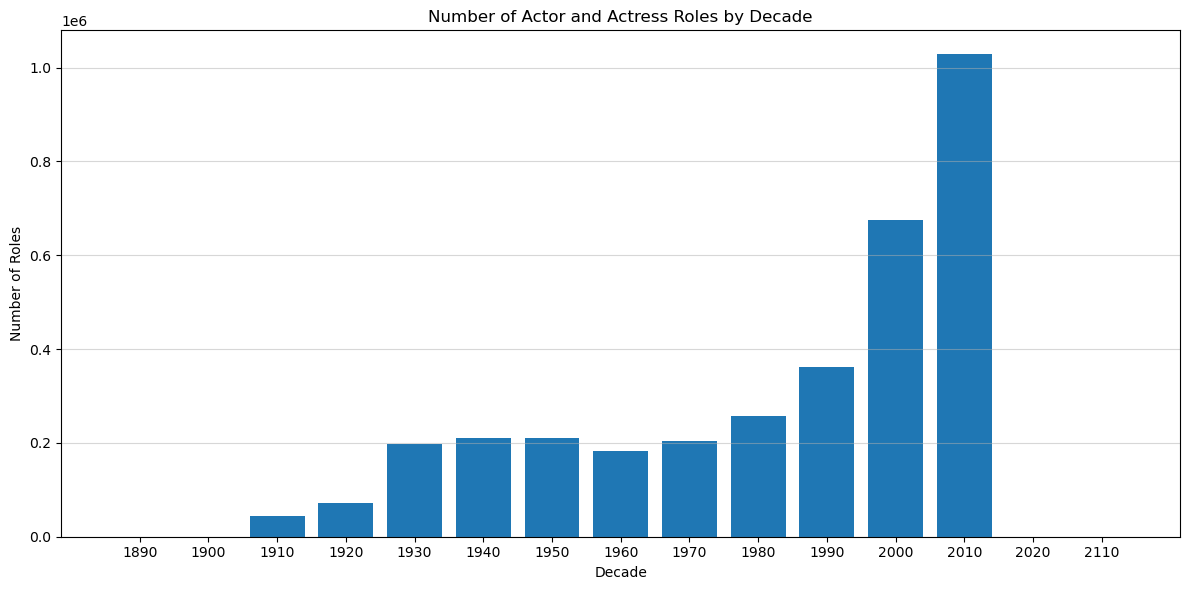

In [78]:
import matplotlib.pyplot as plt

# Clean up missing values
cast_clean = cast.dropna(subset=['year', 'type']).copy()
cast_clean['year'] = cast_clean['year'].astype(int)

# Filter for actors and actresses
cast_filtered = cast_clean[cast_clean['type'].isin(['actor', 'actress'])]

# Create a decade column
cast_filtered['decade'] = (cast_filtered['year'] // 10) * 10

# Count number of roles per decade
roles_per_decade = cast_filtered['decade'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
plt.bar(roles_per_decade.index.astype(str), roles_per_decade.values)
plt.title('Number of Actor and Actress Roles by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Roles')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

month      January  February  March  April    May   June   July  August  \
weekday                                                                   
Monday        3699      3138   3383   3168   3050   2337   2267    2844   
Tuesday       1823      1190   1313   1446   1377   1179   1144    1121   
Wednesday     4663      4118   4479   4650   4289   4282   4243    4270   
Thursday     10746     10356  11844  10625  10100   9469   8947    9931   
Friday       13734     13833  15268  13559  13198  11997  11635   13430   
Saturday      2925      2395   2742   2868   2270   2409   2291    2277   
Sunday        1822      1277   1228   1358   1165   1031    894    1138   

month      September  October  November  December  
weekday                                            
Monday          3161     3551      3372      3240  
Tuesday         1309     1542      1415      1903  
Wednesday       4161     4605      4582      5097  
Thursday       10713    11490     10859     10666  
Friday      

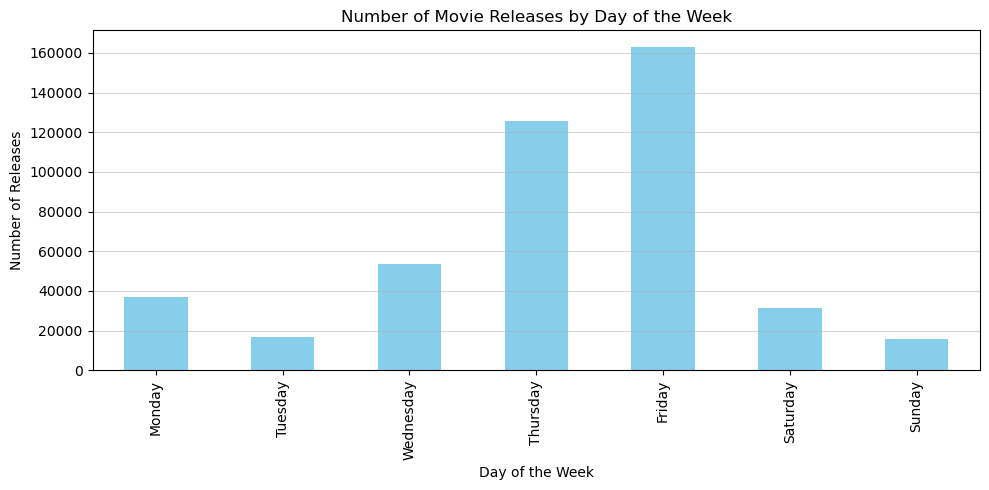

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop missing date values
release_clean = release_dates.dropna(subset=['date']).copy()

# Convert 'date' to datetime
release_clean['date'] = pd.to_datetime(release_clean['date'], errors='coerce')

# Drop rows where date conversion failed
release_clean = release_clean.dropna(subset=['date'])

# Extract weekday and month
release_clean['weekday'] = release_clean['date'].dt.day_name()
release_clean['month'] = release_clean['date'].dt.month_name()

# Create pivot table: count of releases by weekday and month
pivot = pd.pivot_table(
    release_clean,
    index='weekday',
    columns='month',
    values='title',
    aggfunc='count',
    fill_value=0
)

# Reorder for nicer display
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
pivot = pivot.reindex(index=weekday_order, columns=month_order)

# Display pivot table
print(pivot)

# Optional plot: total releases by weekday
weekday_counts = release_clean['weekday'].value_counts().reindex(weekday_order)

plt.figure(figsize=(10, 5))
weekday_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Movie Releases by Day of the Week')
plt.ylabel('Number of Releases')
plt.xlabel('Day of the Week')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


Days
Friday is the most common day for movie releases — studios want to catch weekend audiences.
Thursday and Wednesday also have lots of releases, often for early showings or holiday weekends.
Sunday and Tuesday are the least popular days to release movies.
Monthly Patterns
March, July, October, and November are big release months — because of spring break, summer, Halloween, and holidays.
January and September have fewer releases — these are often slower months for the movie industry.

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

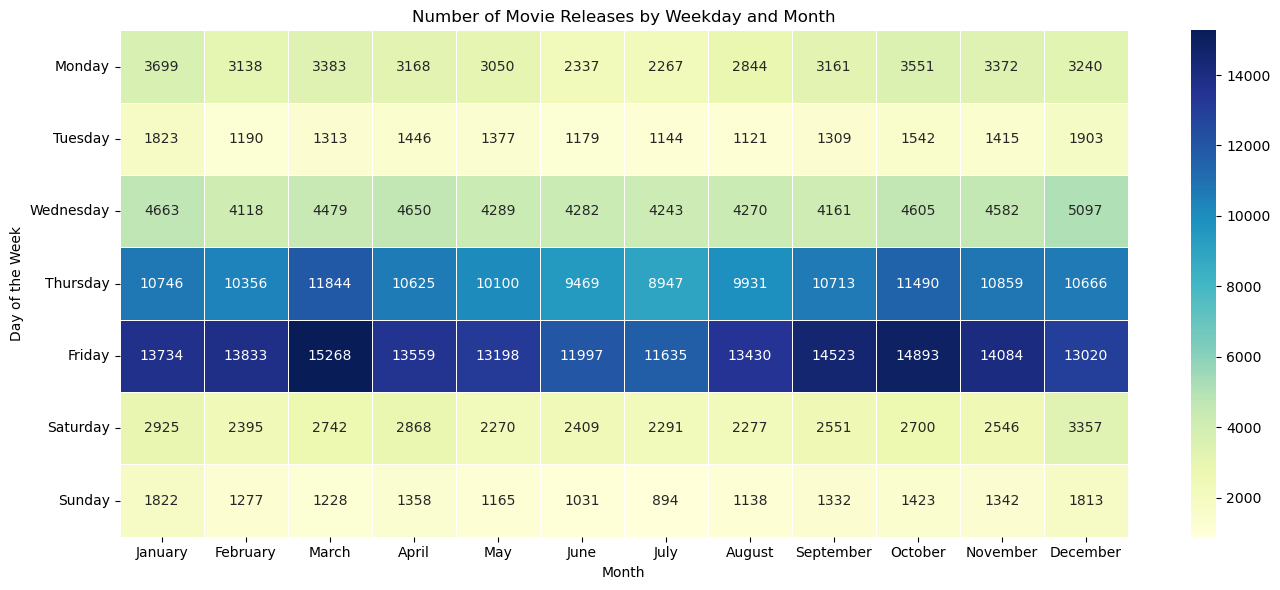

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size and style
plt.figure(figsize=(14, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)

# Titles and labels
plt.title("Number of Movie Releases by Weekday and Month")
plt.xlabel("Month")
plt.ylabel("Day of the Week")
plt.tight_layout()
plt.show()


### 23. What films did actors in Star Wars go on to appear in? 

In [91]:
# Step 1: Get actors from Star Wars films
star_wars_cast = cast[cast['title'].str.contains("Star Wars", case=False, na=False)]

# Get unique list of actor names
star_wars_actors = star_wars_cast['name'].unique()

# Step 2: Get all other roles by those actors (not Star Wars films)
other_roles = cast[
    (cast['name'].isin(star_wars_actors)) &
    (~cast['title'].str.contains("Star Wars", case=False, na=False))
]

# Step 3: Merge with title info to get more context (optional)
other_roles_with_year = other_roles[['name', 'title', 'year']].drop_duplicates().sort_values(['name', 'year'])

# Show sample of the result
print(other_roles_with_year.head(20))


                       name                                      title  year
1076731  Aaron (IV) Kennedy                            One Square Mile  2014
1076732  Aaron (IV) Kennedy                              Run All Night  2015
124861         Adam Bareham                                       Wilt  1990
572279          Adam Driver                                   J. Edgar  2011
572275          Adam Driver                                 Frances Ha  2012
572276          Adam Driver                                      Gayby  2012
572280          Adam Driver                                    Lincoln  2012
572283          Adam Driver                    Not Waving But Drowning  2012
572274          Adam Driver                                   Bluebird  2013
572278          Adam Driver                        Inside Llewyn Davis  2013
572287          Adam Driver                                 The F Word  2013
572292          Adam Driver                                     Tracks  2013

This table shows other movies that Star Wars actors have been in. For example, Adam Driver, who played Kylo Ren, acted in many well-known films like Frances Ha, Inside Llewyn Davis, and Logan Lucky. Some actors, like Aaron Kennedy and Adam Bareham, appeared in smaller or less famous movies. Overall, it shows that Star Wars actors have worked on many different types of films outside the series.